[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1ZvEcfXhMwcpizu532h0KZzsEzVkhqqtZ?usp=sharing)

# Data Mining and Machine Learning 2021 - Team Apple 

### HEC Lausanne - Prof. Michalis Vlachos, Diana Korka, Ahmad Ajalloeian

![](https://raw.githubusercontent.com/Lirette2/DMML2021_Apple/main/documents/1.png)

## Final Notebook
### by Marine Renaudineau, Marco Soto Novoa and irette Teiffouet Noumbo Epse Keumedjio

Let's start with our video

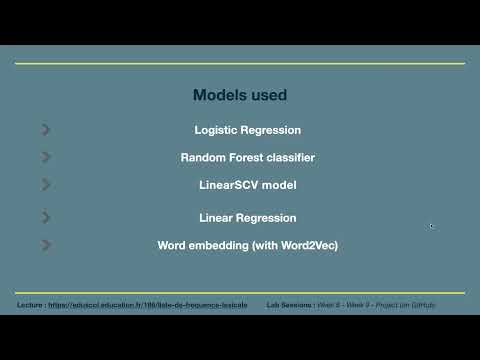

In [144]:
from IPython.display import YouTubeVideo

YouTubeVideo('bQck5J8HyS4', width=800, height=300)

In [ ]:
# Import required packages
!python -m spacy download fr_core_news_sm
#import fr_core_news_sm
import spacy
from spacy import displacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

# Import additional packages
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
from spacy.lang.fr.stop_words import STOP_WORDS
from spacy.lang.fr.examples import sentences 
from spacy.lang.fr import French

     |████████████████████████████████| 14.7 MB 8.3 MB/s 
  Created wheel for fr-core-news-sm: filename=fr_core_news_sm-2.2.5-py3-none-any.whl size=14727026 sha256=66f5c211fb50b157b1461d2a84b6d4e2df026e1ba959eb180f385a254db30386
  Stored in directory: /tmp/pip-ephem-wheel-cache-o4jtzv89/wheels/c9/a6/ea/0778337c34660027ee67ef3a91fb9d3600b76777a912ea1c24
Successfully built fr-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('fr_core_news_sm')


## 1. Models with no data cleaning

In [ ]:
# read in your training data
import pandas as pd
import numpy as np

path = "https://raw.githubusercontent.com/Lirette2/DMML2021_Apple/main/data/training_data.csv"

df = pd.read_csv(path, index_col=0)

In [ ]:
df.head()


,sentence,difficulty
id,,
0,Les coûts kilométriques réels peuvent diverger...,C1
1,"Le bleu, c'est ma couleur préférée mais je n'a...",A1
2,Le test de niveau en français est sur le site ...,A1
3,Est-ce que ton mari est aussi de Boston?,A1
4,"Dans les écoles de commerce, dans les couloirs...",B1


In [ ]:
path = "https://raw.githubusercontent.com/Lirette2/DMML2021_Apple/main/data/unlabelled_test_data.csv"

df_pred = pd.read_csv(path, index_col=0)
df_pred.head()

,sentence
id,
0,Nous dûmes nous excuser des propos que nous eû...
1,Vous ne pouvez pas savoir le plaisir que j'ai ...
2,"Et, paradoxalement, boire froid n'est pas la b..."
3,"Ce n'est pas étonnant, car c'est une saison my..."
4,"Le corps de Golo lui-même, d'une essence aussi..."


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


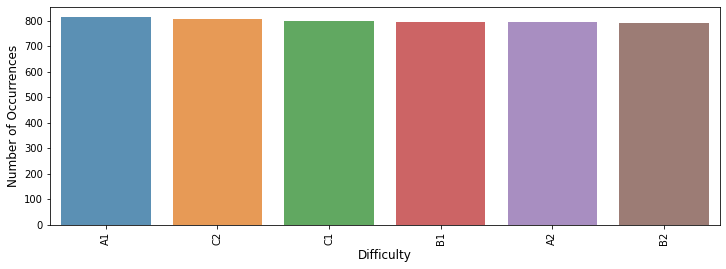

In [ ]:
# Plot number of difficuly sentnces
cnt_pro = df['difficulty'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Difficulty', fontsize=12)
plt.xticks(rotation=90)
plt.show()

### 1.1 Baseline

In [ ]:
np.random.seed = 0

# Select features
X = df['sentence'] # the features we want to analyze
ylabels = df['difficulty'] # the labels, or answers, we want to test against

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.2, random_state=0, stratify=ylabels)

X_train

id
183     Vous attendîtes la surprise que vos parents vo...
90                      Le petit chat a plu à mes parents
1128    Pourfendeur des sciences et des arts, fossoyeu...
2336    un berger est une personne chargée de guider e...
4398    Pendant les trois années d'études, je vivais d...
                              ...                        
3983    La Corse est une petite île au sud de la Franc...
1870                             Ma mère s'appelle Marie.
394     Le journaliste lui a posé des questions auxque...
3244    Les sentiments de l'homme sont confus et mélan...
411     Il n'engendre aucun mouvement alternatif, ce q...
Name: sentence, Length: 3840, dtype: object

In [ ]:
from sklearn.dummy import DummyClassifier

# instantiate with the "most frequent" parameter
dummy = DummyClassifier(strategy='most_frequent')

# fit it as if we had no X features to train it on
dummy.fit(None, y_train)

#compute test baseline and store it for later
baseline = dummy.score(None, y_test)
baseline

0.16979166666666667

In [ ]:
# Evaluate the model
def evaluate(test, pred):
  precision = precision_score(test, pred,average=None)
  recall = recall_score(test, pred, average=None)
  f1= f1_score(test, pred, average=None)
  #print(f'CONFUSION MATRIX:\n{confusion_matrix(test, pred)}')
  print(f'CONFUSION MATRIX:\n')
  conf_mat = confusion_matrix(test, pred)
  fig, ax = plt.subplots(figsize=(7,7))
  sns.heatmap(conf_mat, annot=True, fmt='d')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show()
  print(f"ACCURACY SCORE:\n{accuracy_score(test, pred) :.4f}")
  print(f'CLASSIFICATION REPORT:')
  print("Precision:\t {0:4f}".format(precision_score(test, pred,average="macro"))) 
  print("Recall:\t {0:4f}".format(recall_score(test, pred, average="macro")))
  print("F1_Score:\t {0:4f}".format(f1_score(test, pred, average="macro")))
  


### 1.2 Logistic Regression 

In [ ]:
#Vectorization Feature Engineering (TF-IDF)
#tfidf_vector = TfidfVectorizer(tokenizer=spacy_tokenizer) # we use the above defined tokenizer 
tfidf_vector = TfidfVectorizer()                           
# Define classifier
classifier = LogisticRegression(multi_class="multinomial")

# Create pipeline
pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', classifier)])

# Fit model on training set
pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression(multi_class='multinomial'))])

CONFUSION MATRIX:



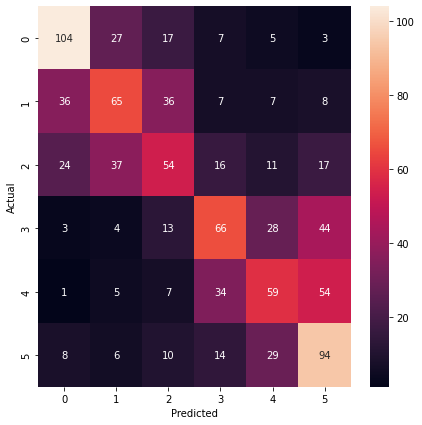

ACCURACY SCORE:
0.4604
CLASSIFICATION REPORT:
Precision:	 0.457754
Recall:	 0.459464
F1_Score:	 0.455442


In [ ]:
# Predictions
y_pred = pipe.predict(X_test)

# Evaluation - test set
evaluate(y_test, y_pred)

### 1.3 KNN

In [ ]:
# Define classifier
from sklearn.neighbors import KNeighborsClassifier
#tfidf_vector = TfidfVectorizer()
knn = KNeighborsClassifier()

# Create pipeline
pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', knn)])

# Fit model on training set
pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', KNeighborsClassifier())])

CONFUSION MATRIX:



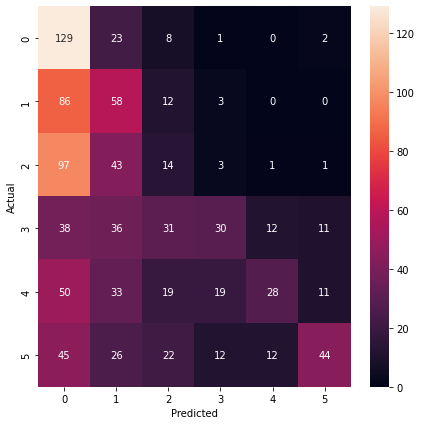

ACCURACY SCORE:
0.3156
CLASSIFICATION REPORT:
Precision:	 0.382327
Recall:	 0.313734
F1_Score:	 0.291315


In [ ]:
# Predictions
y_pred = pipe.predict(X_test)

# Evaluation - test set
evaluate(y_test, y_pred)

In [ ]:
# your code here
#tfidf_vector = TfidfVectorizer()
knn = KNeighborsClassifier(n_neighbors=35, p=2, weights='uniform')
# Create pipeline
pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', knn)])

# Fit model on training set
pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', KNeighborsClassifier(n_neighbors=35))])

CONFUSION MATRIX:



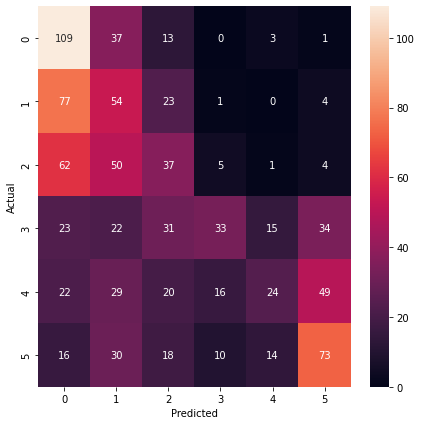

ACCURACY SCORE:
0.3438
CLASSIFICATION REPORT:
Precision:	 0.371288
Recall:	 0.342219
F1_Score:	 0.326032


In [ ]:
# Predictions
y_pred = pipe.predict(X_test)

# Evaluation - test set
evaluate(y_test, y_pred)

### 1.4 Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#tfidf_vector = TfidfVectorizer()
tree = DecisionTreeClassifier()

# Create pipeline
pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', tree)])

# Fit model on training set
pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', DecisionTreeClassifier())])

CONFUSION MATRIX:



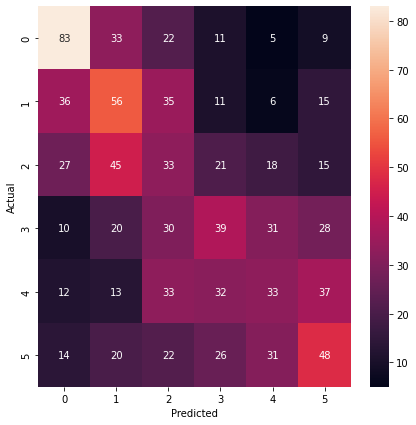

ACCURACY SCORE:
0.3042
CLASSIFICATION REPORT:
Precision:	 0.300762
Recall:	 0.303362
F1_Score:	 0.300552


In [ ]:
# Predictions
y_pred = pipe.predict(X_test)

# Evaluation - test set
evaluate(y_test, y_pred)

In [ ]:
# Define parameter to test
#tfidf_vector = TfidfVectorizer()
grid = {'max_depth':np.arange(1,3)}

tree = DecisionTreeClassifier()

# Create pipeline
pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', tree)])

# Fit model on training set
pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', DecisionTreeClassifier())])

CONFUSION MATRIX:



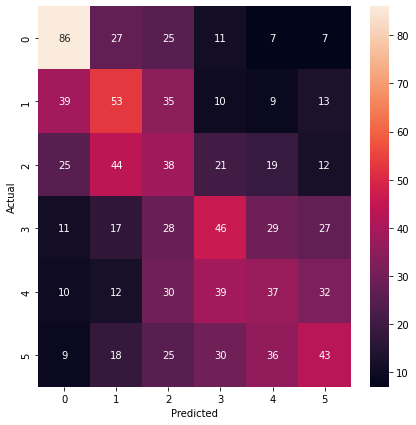

ACCURACY SCORE:
0.3156
CLASSIFICATION REPORT:
Precision:	 0.313604
Recall:	 0.314901
F1_Score:	 0.313158


In [ ]:
# Predictions
y_pred = pipe.predict(X_test)

# Evaluation - test set
evaluate(y_test, y_pred)

### 1.5 Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()

# Create pipeline
pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', random_forest)])

# Fit model on training set
pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

CONFUSION MATRIX:



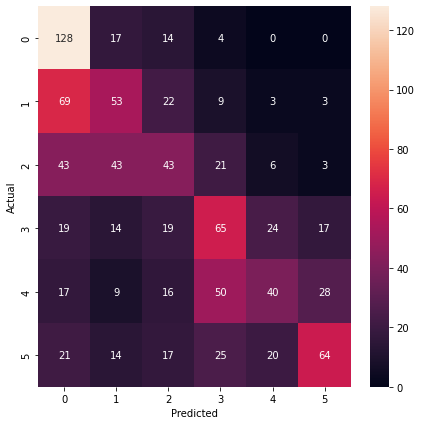

ACCURACY SCORE:
0.4094
CLASSIFICATION REPORT:
Precision:	 0.412124
Recall:	 0.407993
F1_Score:	 0.394609


In [ ]:
# Predictions
y_pred = pipe.predict(X_test)

# Evaluation - test set
evaluate(y_test, y_pred)

### 1.6 Ridge Classifier

In [ ]:
from sklearn.linear_model import RidgeClassifier
Ridge_Class = KNeighborsClassifier()

# Create pipeline
pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', Ridge_Class)])

# Fit model on training set
pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', KNeighborsClassifier())])

CONFUSION MATRIX:



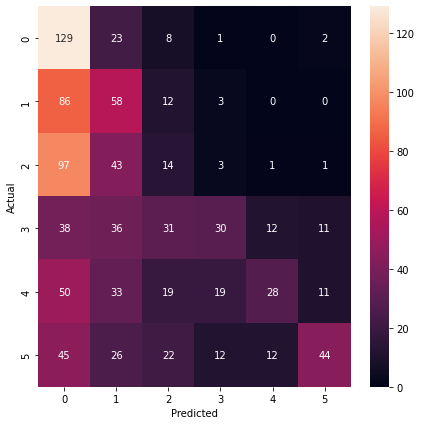

ACCURACY SCORE:
0.3156
CLASSIFICATION REPORT:
Precision:	 0.382327
Recall:	 0.313734
F1_Score:	 0.291315


In [ ]:
# Predictions
y_pred = pipe.predict(X_test)

# Evaluation - test set
evaluate(y_test, y_pred)

## 2 - Models with Data Cleaning

### 2.1 Logistic Regression

In [ ]:
# Create a list of punctuation marks
punctuations = string.punctuation
# Create a list of stopwords
stop_words = spacy.lang.fr.stop_words.STOP_WORDS

# Load French language model
import fr_core_news_sm
sp = fr_core_news_sm.load()

# Create tokenizer function
def spacy_tokenizer(sentence):
    # Create token object, which is used to create documents with linguistic annotations.
    mytokens = sp(sentence)

    # Lemmatize each token and convert each token into lowercase
    mytokens = [ word.lemma_.lower().strip() for word in mytokens ]
    ## alternative way
    # mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Remove stop words and punctuation
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # Return preprocessed list of tokens
    return mytokens

In [ ]:
#Vectorization Feature Engineering (TF-IDF)
tfidf_vector = TfidfVectorizer(tokenizer=spacy_tokenizer) # we use the above defined tokenizer 
#tfidf_vector = TfidfVectorizer()                           
# Define classifier
classifier = LogisticRegression(multi_class="multinomial")

# Create pipeline
pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', classifier)])

# Fit model on training set
pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function spacy_tokenizer at 0x7fc687821710>)),
                ('classifier', LogisticRegression(multi_class='multinomial'))])

CONFUSION MATRIX:



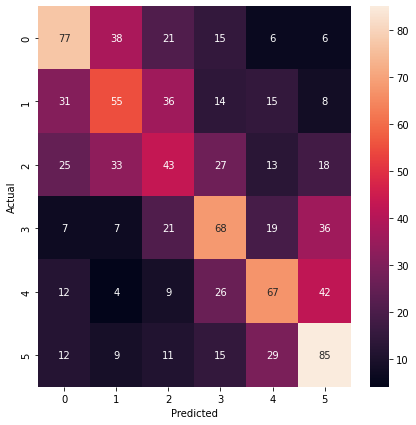

ACCURACY SCORE:
0.4115
CLASSIFICATION REPORT:
Precision:	 0.408145
Recall:	 0.410971
F1_Score:	 0.408418


In [ ]:
# Predictions
y_pred = pipe.predict(X_test)

# Evaluation - test set
evaluate(y_test, y_pred)

### 2.1 Random Forest

In [ ]:
# your code here
from sklearn.ensemble import RandomForestClassifier
tfidf_vector = TfidfVectorizer(tokenizer=spacy_tokenizer)
random_forest = RandomForestClassifier()

# Create pipeline
pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', random_forest)])

# Fit model on training set
pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function spacy_tokenizer at 0x7fc687821710>)),
                ('classifier', RandomForestClassifier())])

CONFUSION MATRIX:



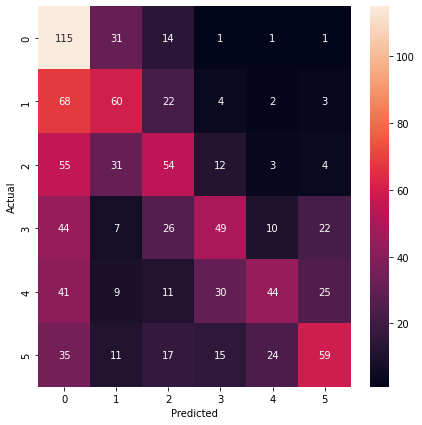

ACCURACY SCORE:
0.3969
CLASSIFICATION REPORT:
Precision:	 0.430285
Recall:	 0.395681
F1_Score:	 0.390261


In [ ]:
# Predictions
y_pred = pipe.predict(X_test)

# Evaluation - test set
evaluate(y_test, y_pred)

### Doc2Vec

In [ ]:

from gensim.models.doc2vec import TaggedDocument

#Doc2Vec
# Not sure how correct this precedure is
#I'm following: https://towardsdatascience.com/multi-class-text-classification-with-doc2vec-logistic-regression-9da9947b43f4

#Multiprocessing, this allows code to run faster because it uses all the CPU available
import multiprocessing
cores = multiprocessing.cpu_count()

# Getting the texts with the correct difficulty tags
texts_tagged = df.apply(
    lambda r: TaggedDocument(words=spacy_tokenizer(r.sentence), tags=[r.difficulty]), axis=1)


In [ ]:
#Doc2Vec: Part 2
#We now build the the vocabulary
#Vector_size was chosen by trail and error
from gensim.models import Doc2Vec

model_dbow = Doc2Vec(dm=0, vector_size=35, negative=6, hs=0, min_count=1, sample = 0, workers=cores)
model_dbow.build_vocab([x for x in texts_tagged.values])

In [ ]:
# Train distributed Bag of Word model
model_dbow.train(texts_tagged, total_examples=model_dbow.corpus_count, epochs=model_dbow.epochs)


In [ ]:
#Doc2Vec: Part 3

def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors

In [ ]:
train_tagged, test_tagged = train_test_split(texts_tagged, test_size=0.2, random_state=1234)

y_train, X_train = vec_for_learning(model_dbow, train_tagged)
y_test, X_test = vec_for_learning(model_dbow, test_tagged)

CONFUSION MATRIX:



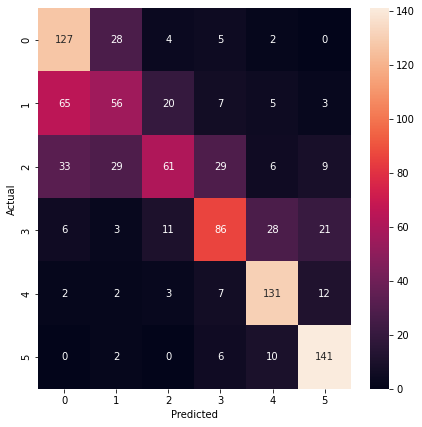

ACCURACY SCORE:
0.6271
CLASSIFICATION REPORT:
Precision:	 0.620004
Recall:	 0.627555
F1_Score:	 0.612390


In [ ]:
from sklearn.svm import LinearSVC

#Train the model
lsvc = LinearSVC(verbose=0)

# Fit model on training set
lsvc.fit(X_train, y_train)
# Predictions
y_pred = lsvc.predict(X_test)

# Evaluation - test set
evaluate(y_test, y_pred)


## 3 - Models with additional regressors 

All the additional regressors come from the literature review we performed. All the information is in the Github main page and in the  ```Documents``` folder. 

As we've already shown many models, I will only focus on one. 



In [122]:
# Load French language model
import fr_core_news_sm
#sp = spacy.load('en_core_web_sm')
sp = fr_core_news_sm.load()

# Create New tokenizer function
def spacy_tokenizer(sentence):
    # Create token object, which is used to create documents with linguistic annotations.
    mytokens = sp(sentence)

    # Lemmatize each token and convert each token into lowercase
    mytokens = [ word.lemma_.lower().strip() for word in mytokens ]
    ## alternative way
    # mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Remove stop words and punctuation
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # Return preprocessed list of tokens
    return mytokens

texts = df['sentence']

# Tokenize texts
processed_texts = []
for text in texts:
  processed_text = spacy_tokenizer(text)
  processed_texts.append(processed_text)

In [123]:
# Word embedding 
### Parameters: 
#     - min_count: minimum number of occurence of single word in corpus to be taken into account
#     - size: dimension of the vectors representing the tokens
#     - IMPORTANT: processed_texts must be a list of lists of tokens object!
from gensim.models import Word2Vec
word2vec = Word2Vec(processed_texts, min_count=2, size=100)
vocab = word2vec.wv.vocab

In [124]:
#### **** ***************** **** ####
#### **** RAW TEXT FEATURES **** ####
#### **** ***************** **** ####

# Count tokens per sentence
def count_token(sent):
  return(len(spacy_tokenizer(sent))) #spacy_tokenizer() to get tokens, len() to count them

# Count raw words per sentence
def count_words(sent):
  return(len(sent.split())) #split() gives us individual words, len() counts them

#Get all characters in a sentece
def count_sentence_character(sent):
  words = sent.split()
  return(sum(len(word) for word in words))

#Get average character length of word
def count_avg_word_character(sent):
  words = sent.split()
  return(sum(len(word) for word in words) / len(words))

def count_avg_token_character(sent):
  words = spacy_tokenizer(sent)
  if len(words) == 0:
    return(0)
  else:
    return(sum(len(word) for word in words) / len(words))

#Get min character length of word
def count_min_word_character(sent):
  words = sent.split()
  return(min(len(word) for word in words))

#Get max character length of word
def count_max_word_character(sent):
  words = sent.split()
  return(max(len(word) for word in words))

In [125]:
#### **** **************** **** ####
#### **** LEXICAL FEATURES **** ####
#### **** **************** **** ####

# Lexical Diversity
def lex_div_word(sent):
  total_number_word = len(sent.split())
  unique = set(sent.split())
  return(len(unique)/total_number_word)
#We don't apply for token, as the goal of the tokenzization is to be left with 
#unique tokens
#For tokens, we should apply to the whole text as done by tfidf_vector

# Lexical Density
def lex_den_tokens(sent):
  st = spacy_tokenizer(sent)
  if len(st) == 0:
    return(0)
  else:
    string = " ".join([str(item) for item in st])
    x = sp(string)
    counter = 0 
    for token in x:
      if token.pos_ == "NOUN" or token.pos_ == "ADJ" or token.pos_ == "VERB" or token.pos_ == "ADV":
        counter = counter + 1
    return(counter/len(st))

def lex_den_words(sent):
  x = sp(sent)
  counter = 0 
  for token in x:
    if token.pos_ == "NOUN" or token.pos_ == "ADJ" or token.pos_ == "VERB" or token.pos_ == "ADV":
      counter = counter + 1
  return(counter/len(x))

# Words NOT in frequent list
path = "https://raw.githubusercontent.com/Lirette2/DMML2021_Apple/main/data/list_words.csv"
words = pd.read_csv(path, index_col=0)


def words_list(sent):
  unique = set(sent.split())
  counter = 0
  for word_in_sentence in unique:
    for word_in_list in words.Mots:
      if word_in_sentence == word_in_list:
        counter = counter + 1
        break#we stop comparing once the word in found, to make it faster
  return(1-(counter/len(unique)))


def token_list(sent):
  unique = spacy_tokenizer(sent)
  if len(unique) == 0:
    return(0)
  else:
    counter = 0
    for word_in_sentence in unique:
      for word_in_list in words.Mots:
        if word_in_sentence == word_in_list:
          counter = counter + 1
          break#we stop comparing once the word in found, to make it faster
    return(1-(counter/len(unique)))

#Word Embedding:
def get_vector(sent):
  token = spacy_tokenizer(sent)
  for word in token: 
    if word in word2vec.wv.vocab:
      return(np.mean(word2vec[word]))

In [126]:
def get_features(data_to_process):
  raw_word_count = pd.Series(data_to_process.sentence.apply(count_words),name="raw_word_count")
  token_count = pd.Series(data_to_process.sentence.apply(count_token),name="token_count")
  avg_chr_word = pd.Series(data_to_process.sentence.apply(count_avg_word_character),name="avg_chr_word")
  min_chr_word = pd.Series(data_to_process.sentence.apply(count_min_word_character),name="min_chr_word")
  max_chr_word = pd.Series(data_to_process.sentence.apply(count_max_word_character),name="max_chr_word")
  tot_chr_stn = pd.Series(data_to_process.sentence.apply(count_sentence_character),name="tot_chr_stn") 
  avg_chr_token = pd.Series(data_to_process.sentence.apply(count_avg_token_character),name="avg_chr_token")
  diversity_word = pd.Series(data_to_process.sentence.apply(lex_div_word),name="diversity_word")
  density_word = pd.Series(data_to_process.sentence.apply(lex_den_words),name="density_word")
  density_token = pd.Series(data_to_process.sentence.apply(lex_den_tokens),name="density_token")
  freq_word_list = pd.Series(data_to_process.sentence.apply(words_list),name="freq_word_list")
  freq_token_list = pd.Series(data_to_process.sentence.apply(token_list),name="freq_token_list")
  token_wv = pd.Series(data_to_process.sentence.apply(get_vector),name="token_wv")
  
  processed_df = pd.concat([data_to_process,raw_word_count,token_count,avg_chr_word,min_chr_word,max_chr_word,tot_chr_stn,avg_chr_token,
                    diversity_word,density_word,density_token,freq_word_list,freq_token_list,token_wv],axis=1)
  return(processed_df)

def scale_data(df_to_scale):
  scaler = MinMaxScaler()
  col_to_scale = ["raw_word_count","token_count","avg_chr_word","min_chr_word","max_chr_word","tot_chr_stn","avg_chr_token",]
  #no need for the others because they already are on a scale from 0 to 1
  df_to_scale[col_to_scale]= scaler.fit_transform(df_to_scale[col_to_scale])
  return(df_to_scale) 


In [127]:
new_df = get_features(df)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:70: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [128]:
new_df = scale_data(new_df)
new_df["token_wv"] = new_df["token_wv"].fillna(0)
new_df.token_wv.isna().sum()

0

In [129]:
# Select features
X = new_df[["sentence","raw_word_count","token_count","avg_chr_word","min_chr_word","max_chr_word","tot_chr_stn","avg_chr_token",
                    "diversity_word","density_word","density_token","freq_word_list",
            "freq_token_list","token_wv",]]# the features we want to analyze

ylabels = new_df['difficulty'] # the labels, or answers, we want to test against

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.2, random_state=1234, stratify=ylabels)

X_train

,sentence,raw_word_count,token_count,avg_chr_word,min_chr_word,max_chr_word,tot_chr_stn,avg_chr_token,diversity_word,density_word,density_token,freq_word_list,freq_token_list,token_wv
id,,,,,,,,,,,,,,
962,Le réalisateur m'a d'abord demandé de me mettr...,0.037879,0.032,0.272727,0.083333,0.333333,0.039110,0.645833,1.000000,0.428571,1.000000,0.545455,0.500000,0.000067
1886,"Après quelques mois de cette pauvreté noble, a...",0.109848,0.112,0.266667,0.083333,0.375000,0.110429,0.517857,0.966667,0.352941,0.714286,0.586207,0.714286,-0.000523
2721,L'indicateur n'était que de 40% chez les femme...,0.034091,0.040,0.245455,0.083333,0.375000,0.032975,0.483333,1.000000,0.357143,0.600000,0.600000,0.800000,-0.000253
1025,L'objectif de ce type de voyage est d'être act...,0.094697,0.096,0.241259,0.083333,0.291667,0.089724,0.527778,0.923077,0.482759,1.000000,0.375000,0.416667,-0.000013
4048,"Et, en France, beaucoup moins de filles que de...",0.083333,0.080,0.276680,0.000000,0.458333,0.085890,0.500000,0.956522,0.384615,0.500000,0.636364,0.300000,-0.000844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3693,Je vais prendre ma douche dans ma salle-de-bain.,0.026515,0.032,0.284091,0.083333,0.458333,0.028374,0.645833,0.875000,0.333333,0.750000,0.714286,0.500000,-0.000626
3408,"Après l'éruption de 1754, la plus grosse connu...",0.132576,0.128,0.275253,0.000000,0.375000,0.135736,0.546875,0.805556,0.380952,0.625000,0.655172,0.625000,-0.000520
4289,Léonard est initié par Verrocchio aux nombreus...,0.117424,0.120,0.369318,0.083333,0.458333,0.145706,0.644444,0.937500,0.472222,0.866667,0.666667,0.866667,-0.000052


CONFUSION MATRIX:



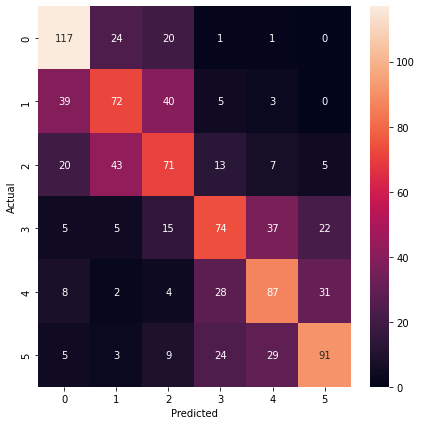

ACCURACY SCORE:
0.5333
CLASSIFICATION REPORT:
Precision:	 0.530738
Recall:	 0.532414
F1_Score:	 0.530353


In [130]:
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC


# Define classifier
lsvc = LinearSVC(verbose=0)
#Vectorizer
tfidf_vector = TfidfVectorizer(sublinear_tf=True, min_df=1, norm='l2', ngram_range=(1, 8), 
                         tokenizer=spacy_tokenizer,analyzer="char")


#Column Transformer (to apply vectorizer to the right column)
column_transformer = ColumnTransformer(
    [("tfidf", tfidf_vector, "sentence")],
    remainder="passthrough")

# Create pipeline

pipe_lsvc = Pipeline([("tfidf",column_transformer),("model", lsvc)])

# Fit model on training set
pipe_lsvc.fit(X_train,y_train)
# Predictions
y_pred=pipe_lsvc.predict(X_test)

# Evaluation - test set
evaluate(y_test, y_pred)

## 4 - Submission 


In [131]:
### Submission data

path = "https://raw.githubusercontent.com/Lirette2/DMML2021_Apple/main/data/unlabelled_test_data.csv"
sub_df = pd.read_csv(path, index_col=0)

new_sub_df = get_features(sub_df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:70: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [132]:
new_sub_df = scale_data(new_sub_df)
new_sub_df["token_wv"] = new_sub_df["token_wv"].fillna(0)
#new_sub_df.token_wv.isna().sum()

In [133]:
#Retrain the model on the labelled whole dataset
#Train the model
lsvc = LinearSVC(verbose=0)

pipe_lsvc = Pipeline([("tfidf",column_transformer),("model", lsvc)])
pipe_lsvc.fit(X,ylabels)

Pipeline(steps=[('tfidf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tfidf',
                                                  TfidfVectorizer(analyzer='char',
                                                                  ngram_range=(1,
                                                                               8),
                                                                  sublinear_tf=True,
                                                                  tokenizer=<function spacy_tokenizer at 0x7fc66fabc3b0>),
                                                  'sentence')])),
                ('model', LinearSVC())])

In [134]:
X_sub = new_sub_df[["sentence","raw_word_count","token_count","avg_chr_word","min_chr_word","max_chr_word","tot_chr_stn","avg_chr_token",
                    "diversity_word","density_word","density_token","freq_word_list",
            "freq_token_list","token_wv"]]

In [135]:
y_sub = pipe_lsvc.predict(X_sub)


In [136]:
new_sub_df["difficulty"] = y_sub
submission = new_sub_df.filter(["id","difficulty"],axis=1)
submission

,difficulty
id,
0,C2
1,B1
2,C1
3,B1
4,C2
...,...
1195,C2
1196,A1
1197,C2


In [137]:
from google.colab import files
submission.to_csv('submission_test_apple_unil.csv') 
files.download('submission_test_apple_unil.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>